In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import nltk

In [4]:
from nltk.stem import PorterStemmer

In [5]:
from nltk.corpus import stopwords

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn import cluster

In [8]:
stemmer = PorterStemmer()

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\desha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
sw = stopwords.words('english')

In [11]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
keywords = ['Disaster response','Emergency logistics','Evolutionary algorithm','Multi-objective optimization','Resource allocation','Decision support systems','Disaster operations management','Long-term planning','Multi-hazard events','Delay tolerant network','human mobility pattern','integer programming','opportunistic knowledge sharing','optimal resource allocation','post disaster situation awareness','utility function','Resource allocation','domain transportation','emergency management','multi-agent system','Collective intelligence','Computational resource','management','Emerging technologies','European disasters','Integrated disaster management','Decision-support-system','Disaster','Disaster-management','Resource-capacity','Resource-management','Clock driven','Priority driven','Resource allocation','Scheduling algorithm','Decision support','Optimization','Pandemic flu','Resource allocation','Data mining','knowledge discovery','and personalized','Enterprise resource optimization','Healthcare information systems','Agent-based simulation','Emergency response','Resource allocation optimization','Disaster','Preparedness','Relief','Cluster of inventory location','Disaster relief operation','Humanitarian logistic and inventory','Lateral transshipment','Stable roomate problem','Allocation of resources or their shortages','Multicriteria robust solutions','Multiobjective decision making','Possibilistic approach','Qualitative information processing','Transformation functions','Branch-and-price','Disaster operations management','Operations research in disaster relief','Scheduling','Disaster relief','Facebook disaster map','Genetic algorithm','Intensity of demand','LINGO','Social media','Agent coordination','Disaster environments','Intelligent agents','Resource allocation','Column generation','Emergency medical service','Mass casualty incident','Operations research in disaster relief','Triage','Assignment','Decision support systems','Heuristics','Natural Disaster Management','Scheduling','Disaster chain','Multistage optimization','Non-dominated sorting genetic algorithm','Rescue team','Scheduling strategy','Disaster relief','Emergency operational problems','Evolutionary algorithms','Optimization','Bushfire or wildfire','Disaster Management','Emergency operations','Non-expendable resources','Optimization','Resource scheduling','Uncertainty','Logistics','proximal bundle method','risk-averse optimization','stochastic programming','Emergency logistics planning','Humanitarian logistics','Operations research in disaster relief','Risk-aversion','Two-stage stochastic programming','Operations research in disaster relief','Resource allocation','Simultaneous disasters','Stochastic optimisation','Bipartite Graph Theory','Disaster Management','Internet of Things','Resource Allocation','Emergency logistics','distribution optimization','material distribution','road impedance','Distributed algorithms','Emergency evacuation','Fairness','Optimization','Resource allocation','Disaster Management','Graph Theory','Internet of Things','Resource Scheduling','Emergency management','decision support','medical resource allocation','network flows','Discrete event systems','Emergency response process','Petri nets','Resource allocation','Timed petri nets','Uncertain duration','Workflow management','Data monitoring','Disaster management','Internet of Things','Resource Scheduling','Wireless sensor network disaster response','emergency management','modeling','resource allocation','Multi-hazard events','decision support systems','disaster operations management','disaster recovery center','long-term planning','Cellular genetic algorithm','disaster relief','emergency logistics','emergency resource allocation','multi-objective optimization','Delay tolerant net-work','Disaster management','Post-disaster environments','Resource allocation','Emergency logistics','Emergency management','Humanitarian logistics','Relief distribution networks','Response optimization','emergency facility location','emergency resource allocation','emergency resource scheduling','optimzation models','unconwentional emergenciess','Disaster Management','Dynamic Resource Scheduling','Fire extinguishing equipment','Fires','Optimal allocation','Power grids','Risk analysis','Transmission lines','Allocation of Resources','Coronavirus','Disaster Planning','Pandemics','Cholera outbreak intervention','Data-driven optimization','Infectious disease transmission','Operations research in health services','Resource allocation','Disaster preparedness','Humanitarian logistics','Multiple objective programming','Operations research in disaster relief']

In [15]:
keywords_lower = [k.lower() for k in keywords]

In [17]:
keywords_lower

['disaster response',
 'emergency logistics',
 'evolutionary algorithm',
 'multi-objective optimization',
 'resource allocation',
 'decision support systems',
 'disaster operations management',
 'long-term planning',
 'multi-hazard events',
 'delay tolerant network',
 'human mobility pattern',
 'integer programming',
 'opportunistic knowledge sharing',
 'optimal resource allocation',
 'post disaster situation awareness',
 'utility function',
 'resource allocation',
 'domain transportation',
 'emergency management',
 'multi-agent system',
 'collective intelligence',
 'computational resource',
 'management',
 'emerging technologies',
 'european disasters',
 'integrated disaster management',
 'decision-support-system',
 'disaster',
 'disaster-management',
 'resource-capacity',
 'resource-management',
 'clock driven',
 'priority driven',
 'resource allocation',
 'scheduling algorithm',
 'decision support',
 'optimization',
 'pandemic flu',
 'resource allocation',
 'data mining',
 'knowledg

In [16]:
keywords_list = [i.replace('-',' ') for i in keywords_lower]

In [18]:
keywords_list

['disaster response',
 'emergency logistics',
 'evolutionary algorithm',
 'multi objective optimization',
 'resource allocation',
 'decision support systems',
 'disaster operations management',
 'long term planning',
 'multi hazard events',
 'delay tolerant network',
 'human mobility pattern',
 'integer programming',
 'opportunistic knowledge sharing',
 'optimal resource allocation',
 'post disaster situation awareness',
 'utility function',
 'resource allocation',
 'domain transportation',
 'emergency management',
 'multi agent system',
 'collective intelligence',
 'computational resource',
 'management',
 'emerging technologies',
 'european disasters',
 'integrated disaster management',
 'decision support system',
 'disaster',
 'disaster management',
 'resource capacity',
 'resource management',
 'clock driven',
 'priority driven',
 'resource allocation',
 'scheduling algorithm',
 'decision support',
 'optimization',
 'pandemic flu',
 'resource allocation',
 'data mining',
 'knowledg

In [19]:
def tokenizer(keyword):
    return [stemmer.stem(w) for w in keyword.split(' ')]

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = sw)

In [33]:
X = pd.DataFrame(tfidf.fit_transform(keywords_list).toarray(), index = keywords_list, columns = tfidf.get_feature_names())

In [22]:
from IPython.display import display

In [23]:
pd.set_option('display.max_columns', 500)

In [24]:
pd.set_option('display.max_rows', 500)

In [25]:
X

agent  algorithm     alloc  \
disaster response                           0.000000   0.000000  0.000000   
emergency logistics                         0.000000   0.000000  0.000000   
evolutionary algorithm                      0.000000   0.629718  0.000000   
multi objective optimization                0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
decision support systems                    0.000000   0.000000  0.000000   
disaster operations management              0.000000   0.000000  0.000000   
long term planning                          0.000000   0.000000  0.000000   
multi hazard events                         0.000000   0.000000  0.000000   
delay tolerant network                      0.000000   0.000000  0.000000   
human mobility pattern                      0.000000   0.000000  0.000000   
integer programming                         0.000000   0.000000  0.000000   
opportunistic knowledge sharing             0.000000   0.000000  0.000000   
optimal resource allocation                 0.000000   0.000000  0.580569   
post disaster situation awareness           0.000000   0.000000  0.000000   
utility function                            0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
domain transportation                       0.000000   0.000000  0.000000   
emergency management                        0.000000   0.000000  0.000000   
multi agent system                          0.604982   0.000000  0.000000   
collective intelligence                     0.000000   0.000000  0.000000   
computational resource                      0.000000   0.000000  0.000000   
management                                  0.000000   0.000000  0.000000   
emerging technologies                       0.000000   0.000000  0.000000   
european disasters                          0.000000   0.000000  0.000000   
integrated disaster management              0.000000   0.000000  0.000000   
decision support system                     0.000000   0.000000  0.000000   
disaster                                    0.000000   0.000000  0.000000   
disaster management                         0.000000   0.000000  0.000000   
resource capacity                           0.000000   0.000000  0.000000   
resource management                         0.000000   0.000000  0.000000   
clock driven                                0.000000   0.000000  0.000000   
priority driven                             0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
scheduling algorithm                        0.000000   0.726139  0.000000   
decision support                            0.000000   0.000000  0.000000   
optimization                                0.000000   0.000000  0.000000   
pandemic flu                                0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
data mining                                 0.000000   0.000000  0.000000   
knowledge discovery                         0.000000   0.000000  0.000000   
and personalized                            0.000000   0.000000  0.000000   
enterprise resource optimization            0.000000   0.000000  0.000000   
healthcare information systems              0.000000   0.000000  0.000000   
agent based simulation                      0.508849   0.000000  0.000000   
emergency response                          0.000000   0.000000  0.000000   
resource allocation optimization            0.000000   0.000000  0.580569   
disaster                                    0.000000   0.000000  0.000000   
preparedness                                0.000000   0.000000  0.000000   
relief                                      0.000000   0.000000  0.000000   
cluster of inventory location               0.000000   0.000000  0.000000   
disaster relief operation                  

In [45]:
Z = X

In [46]:
af = cluster.AffinityPropagation().fit_predict(X)

C:\Users\desha\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


In [47]:
af

array([ 5,  0,  1, 29, 27,  2,  6,  3, 28,  4, 36, 19,  9, 27, 30, 12, 27,
        0, 23, 15, 15, 27,  6, 23,  5,  6,  2,  5,  6, 27,  6, 34, 34, 27,
       18,  2,  7,  8, 27, 34,  9,  4,  7,  2, 15, 24, 27,  5, 10, 13, 11,
       36, 31, 16, 17, 27, 17,  2,  0, 24, 12, 15,  6, 36, 18, 13,  5, 14,
       21, 13, 17, 15, 30, 15, 27,  3, 23, 26, 36, 35,  8,  2, 16,  6, 18,
        5,  7, 14, 16, 18, 13, 17,  1,  7, 15,  6, 17, 27,  7, 18, 35,  0,
       21, 20, 19,  0, 31, 36, 20, 19, 36, 27,  5, 19, 21,  6, 26, 27,  0,
       22, 22,  0, 22, 23, 16,  7, 27,  6, 21, 26, 18, 23,  2, 27,  4, 28,
       24, 25, 27, 25, 15,  6, 34,  6, 26, 18,  5, 23, 32, 27, 28,  2,  6,
        5,  3, 14, 13,  0, 27, 29,  4,  6, 30, 27,  0, 23, 31, 22,  7, 11,
       27, 18, 32,  7,  6, 18, 33, 33,  7, 15, 20, 35, 27, 15,  5,  8, 35,
       34, 35, 36, 27, 10, 31, 19, 36], dtype=int64)

In [50]:
unique, counts = np.unique(af, return_counts=True)
dict(zip(unique, counts))

{0: 9,
 1: 2,
 2: 8,
 3: 3,
 4: 4,
 5: 10,
 6: 15,
 7: 9,
 8: 3,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 5,
 14: 3,
 15: 10,
 16: 4,
 17: 5,
 18: 9,
 19: 5,
 20: 3,
 21: 4,
 22: 4,
 23: 7,
 24: 3,
 25: 2,
 26: 4,
 27: 22,
 28: 3,
 29: 2,
 30: 3,
 31: 4,
 32: 2,
 33: 2,
 34: 5,
 35: 5,
 36: 8}

In [77]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=int64)

In [95]:
c = cluster.AffinityPropagation(preference = -50)

In [96]:
X['labels'] = c.fit_predict(X)

C:\Users\desha\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


In [97]:
X

agent  algorithm     alloc  \
disaster response                           0.000000   0.000000  0.000000   
emergency logistics                         0.000000   0.000000  0.000000   
evolutionary algorithm                      0.000000   0.629718  0.000000   
multi objective optimization                0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
decision support systems                    0.000000   0.000000  0.000000   
disaster operations management              0.000000   0.000000  0.000000   
long term planning                          0.000000   0.000000  0.000000   
multi hazard events                         0.000000   0.000000  0.000000   
delay tolerant network                      0.000000   0.000000  0.000000   
human mobility pattern                      0.000000   0.000000  0.000000   
integer programming                         0.000000   0.000000  0.000000   
opportunistic knowledge sharing             0.000000   0.000000  0.000000   
optimal resource allocation                 0.000000   0.000000  0.580569   
post disaster situation awareness           0.000000   0.000000  0.000000   
utility function                            0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
domain transportation                       0.000000   0.000000  0.000000   
emergency management                        0.000000   0.000000  0.000000   
multi agent system                          0.604982   0.000000  0.000000   
collective intelligence                     0.000000   0.000000  0.000000   
computational resource                      0.000000   0.000000  0.000000   
management                                  0.000000   0.000000  0.000000   
emerging technologies                       0.000000   0.000000  0.000000   
european disasters                          0.000000   0.000000  0.000000   
integrated disaster management              0.000000   0.000000  0.000000   
decision support system                     0.000000   0.000000  0.000000   
disaster                                    0.000000   0.000000  0.000000   
disaster management                         0.000000   0.000000  0.000000   
resource capacity                           0.000000   0.000000  0.000000   
resource management                         0.000000   0.000000  0.000000   
clock driven                                0.000000   0.000000  0.000000   
priority driven                             0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
scheduling algorithm                        0.000000   0.726139  0.000000   
decision support                            0.000000   0.000000  0.000000   
optimization                                0.000000   0.000000  0.000000   
pandemic flu                                0.000000   0.000000  0.000000   
resource allocation                         0.000000   0.000000  0.747109   
data mining                                 0.000000   0.000000  0.000000   
knowledge discovery                         0.000000   0.000000  0.000000   
and personalized                            0.000000   0.000000  0.000000   
enterprise resource optimization            0.000000   0.000000  0.000000   
healthcare information systems              0.000000   0.000000  0.000000   
agent based simulation                      0.508849   0.000000  0.000000   
emergency response                          0.000000   0.000000  0.000000   
resource allocation optimization            0.000000   0.000000  0.580569   
disaster                                    0.000000   0.000000  0.000000   
preparedness                                0.000000   0.000000  0.000000   
relief                                      0.000000   0.000000  0.000000   
cluster of inventory location               0.000000   0.000000  0.000000   
disaster relief operation                  

In [99]:
unique_clusters, counts = np.unique(X['labels'], return_counts=True)
dict(zip(unique, counts))

{0: 24, 1: 19, 2: 22, 3: 18, 4: 26, 5: 17, 6: 26, 7: 25, 8: 18}

In [100]:
unique_clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [114]:
def clustered_words(cluster_label):
    list_words = X.index[X['labels'] == cluster_label].tolist()
    return list_words  

In [115]:
clustered_words(0)

['resource allocation',
 'integer programming',
 'opportunistic knowledge sharing',
 'optimal resource allocation',
 'post disaster situation awareness',
 'utility function',
 'resource allocation',
 'domain transportation',
 'emergency management',
 'multi agent system',
 'collective intelligence',
 'computational resource',
 'management',
 'resource allocation optimization',
 'humanitarian logistics',
 'emergency management',
 'emergency management',
 'emergency resource allocation',
 'delay tolerant net work',
 'post disaster environments',
 'resource allocation',
 'emergency management',
 'humanitarian logistics',
 'emergency resource allocation']

In [116]:
clustered_words(1)

['disaster',
 'enterprise resource optimization',
 'healthcare information systems',
 'agent based simulation',
 'emergency response',
 'disaster',
 'preparedness',
 'relief',
 'cluster of inventory location',
 'disaster relief operation',
 'humanitarian logistic and inventory',
 'lateral transshipment',
 'stable roomate problem',
 'allocation of resources or their shortages',
 'multicriteria robust solutions',
 'multiobjective decision making',
 'possibilistic approach',
 'qualitative information processing',
 'transformation functions']

In [117]:
clustered_words(2)

['branch and price',
 'disaster operations management',
 'scheduling',
 'disaster relief',
 'facebook disaster map',
 'genetic algorithm',
 'intensity of demand',
 'lingo',
 'social media',
 'agent coordination',
 'disaster environments',
 'intelligent agents',
 'resource allocation',
 'column generation',
 'heuristics',
 'natural disaster management',
 'scheduling',
 'disaster chain',
 'multistage optimization',
 'non dominated sorting genetic algorithm',
 'resource allocation',
 'disaster relief']

In [118]:
clustered_words(3)

['optimization',
 'emergency medical service',
 'mass casualty incident',
 'operations research in disaster relief',
 'triage',
 'assignment',
 'rescue team',
 'scheduling strategy',
 'disaster relief',
 'emergency operational problems',
 'optimization',
 'bushfire or wildfire',
 'proximal bundle method',
 'risk averse optimization',
 'stochastic programming',
 'emergency logistics planning',
 'operations research in disaster relief',
 'risk aversion']

In [119]:
clustered_words(4)

['disaster response',
 'emergency logistics',
 'evolutionary algorithm',
 'multi objective optimization',
 'emerging technologies',
 'european disasters',
 'integrated disaster management',
 'disaster management',
 'resource capacity',
 'resource management',
 'clock driven',
 'evolutionary algorithms',
 'bipartite graph theory',
 'disaster management',
 'internet of things',
 'emergency logistics',
 'distribution optimization',
 'material distribution',
 'road impedance',
 'distributed algorithms',
 'internet of things',
 'internet of things',
 'emergency logistics',
 'multi objective optimization',
 'emergency logistics',
 'disaster management']

In [120]:
clustered_words(5)

['long term planning',
 'delay tolerant network',
 'human mobility pattern',
 'emergency operations',
 'non expendable resources',
 'resource scheduling',
 'uncertainty',
 'logistics',
 'resource scheduling',
 'network flows',
 'discrete event systems',
 'emergency response process',
 'petri nets',
 'timed petri nets',
 'uncertain duration',
 'workflow management',
 'resource scheduling']

In [121]:
clustered_words(6)

['decision support systems',
 'decision support system',
 'priority driven',
 'resource allocation',
 'scheduling algorithm',
 'pandemic flu',
 'data mining',
 'knowledge discovery',
 'and personalized',
 'operations research in disaster relief',
 'decision support systems',
 'two stage stochastic programming',
 'operations research in disaster relief',
 'resource allocation',
 'simultaneous disasters',
 'stochastic optimisation',
 'resource allocation',
 'data monitoring',
 'wireless sensor network disaster response',
 'modeling',
 'resource allocation',
 'decision support systems',
 'disaster recovery center',
 'long term planning',
 'cellular genetic algorithm',
 'operations research in disaster relief']

In [122]:
clustered_words(7)

['disaster operations management',
 'multi hazard events',
 'decision support',
 'resource allocation',
 'disaster management',
 'optimization',
 'emergency evacuation',
 'fairness',
 'optimization',
 'resource allocation',
 'disaster management',
 'graph theory',
 'decision support',
 'medical resource allocation',
 'disaster management',
 'multi hazard events',
 'disaster operations management',
 'disaster management',
 'relief distribution networks',
 'response optimization',
 'emergency facility location',
 'emergency resource scheduling',
 'optimzation models',
 'unconwentional emergenciess',
 'resource allocation']

In [123]:
clustered_words(8)

['dynamic resource scheduling',
 'fire extinguishing equipment',
 'fires',
 'optimal allocation',
 'power grids',
 'risk analysis',
 'transmission lines',
 'allocation of resources',
 'coronavirus',
 'disaster planning',
 'pandemics',
 'cholera outbreak intervention',
 'data driven optimization',
 'infectious disease transmission',
 'operations research in health services',
 'disaster preparedness',
 'humanitarian logistics',
 'multiple objective programming']

In [124]:
!pip install wordcloud
!pip install ipywidgets

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

In [125]:
def calculate_cluster_frequencies(word_list):
    words_dict = {}

    for word in word_list:
        if word not in words_dict.keys():
            words_dict[word] = word_list.count(word)
        

    cloud = wordcloud.WordCloud(background_color = 'White', width = 1000, height =1000)
    cloud.generate_from_frequencies(words_dict)
    return cloud.to_array()

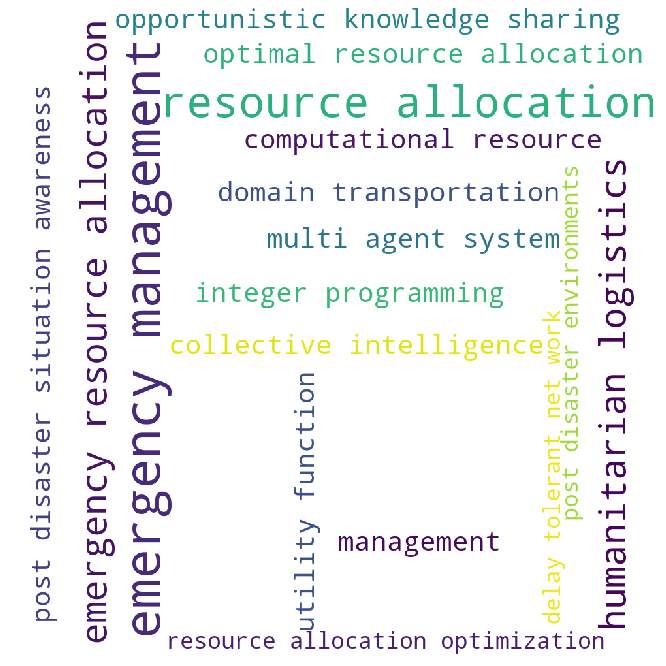

In [128]:
cloud_image = calculate_cluster_frequencies(clustered_words(0))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

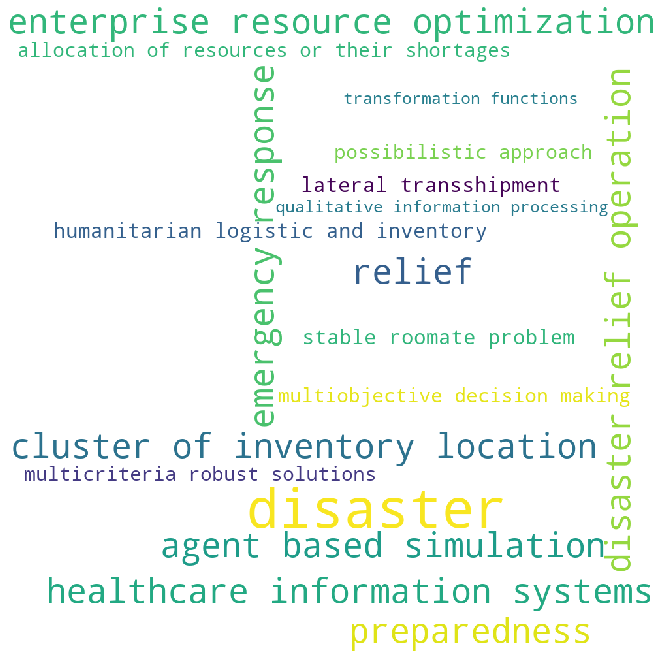

In [127]:
cloud_image = calculate_cluster_frequencies(clustered_words(1))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

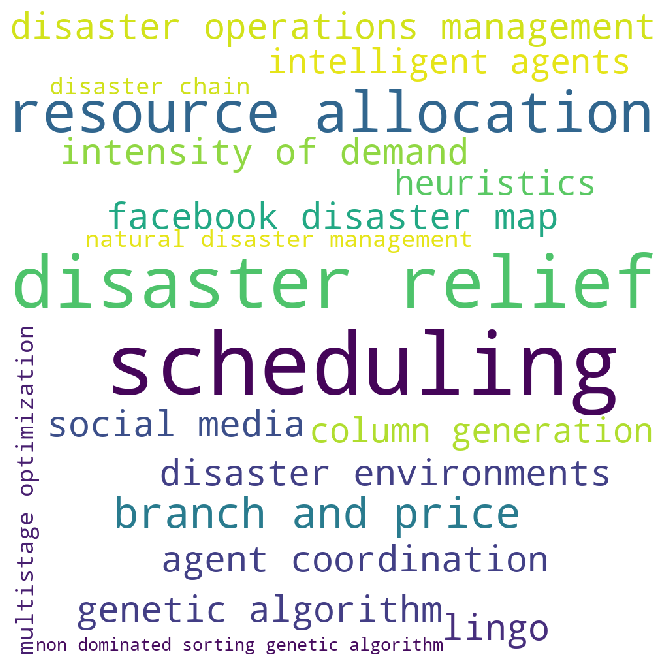

In [129]:
cloud_image = calculate_cluster_frequencies(clustered_words(2))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

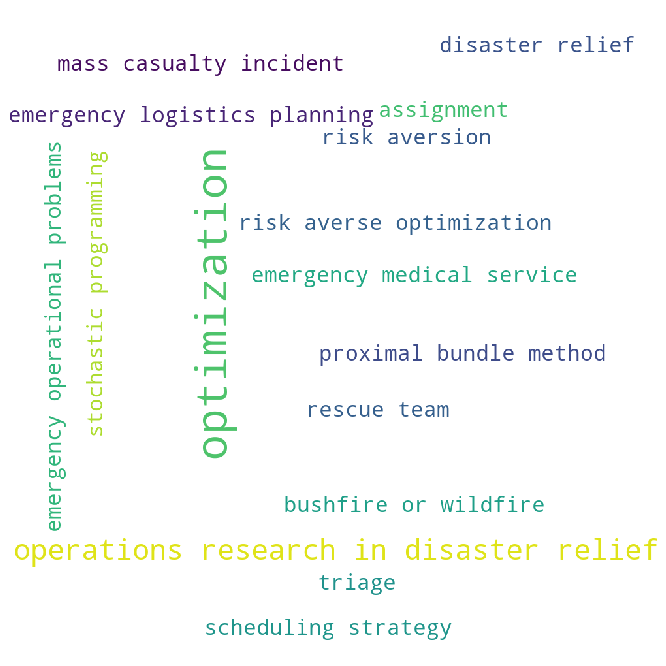

In [130]:
cloud_image = calculate_cluster_frequencies(clustered_words(3))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

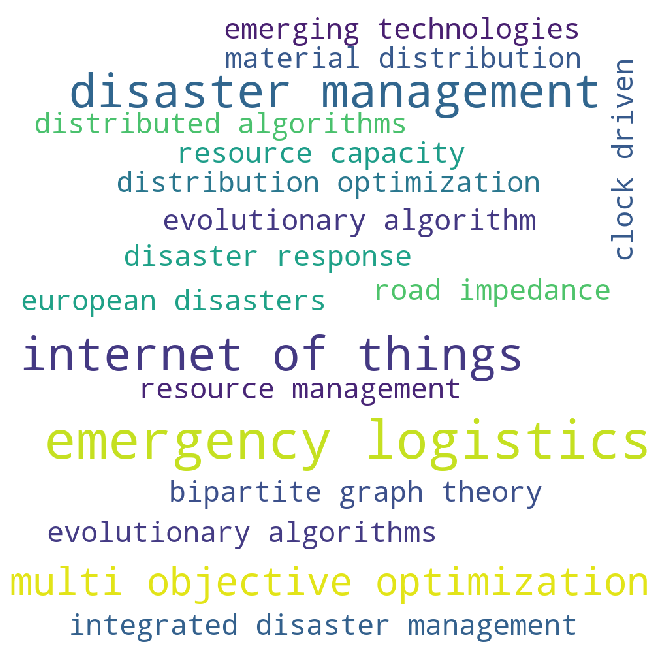

In [131]:
cloud_image = calculate_cluster_frequencies(clustered_words(4))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

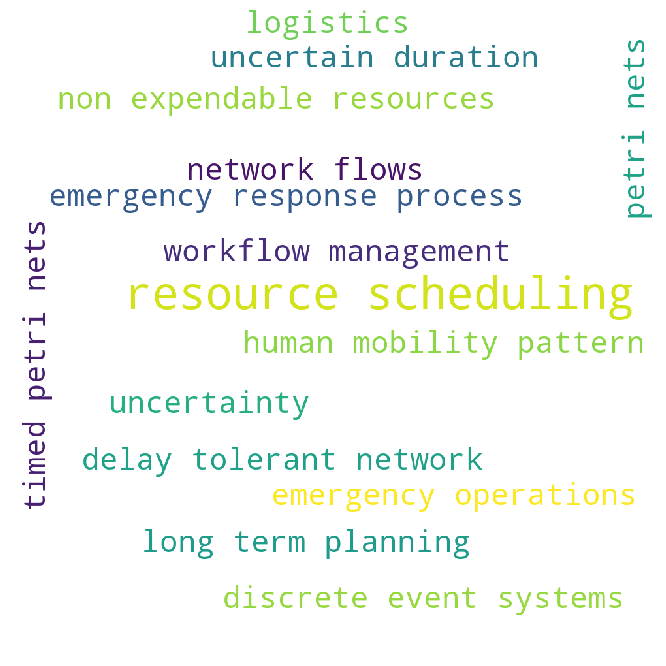

In [132]:
cloud_image = calculate_cluster_frequencies(clustered_words(5))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

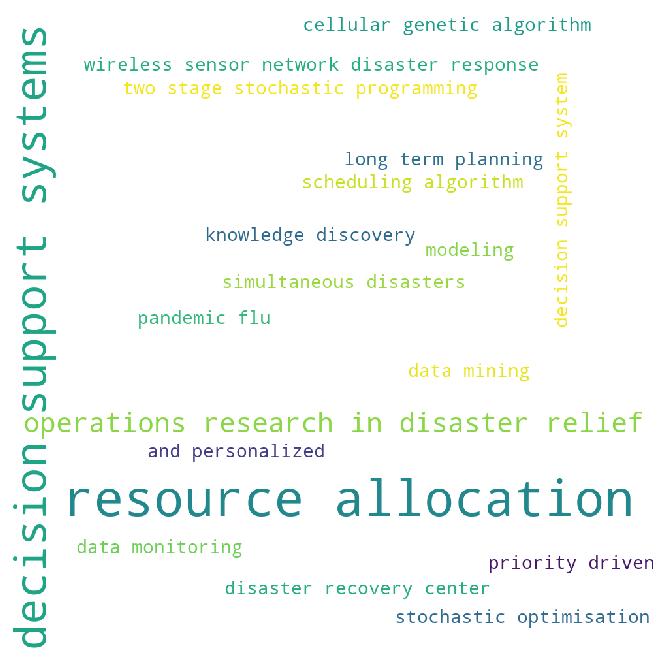

In [133]:
cloud_image = calculate_cluster_frequencies(clustered_words(6))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

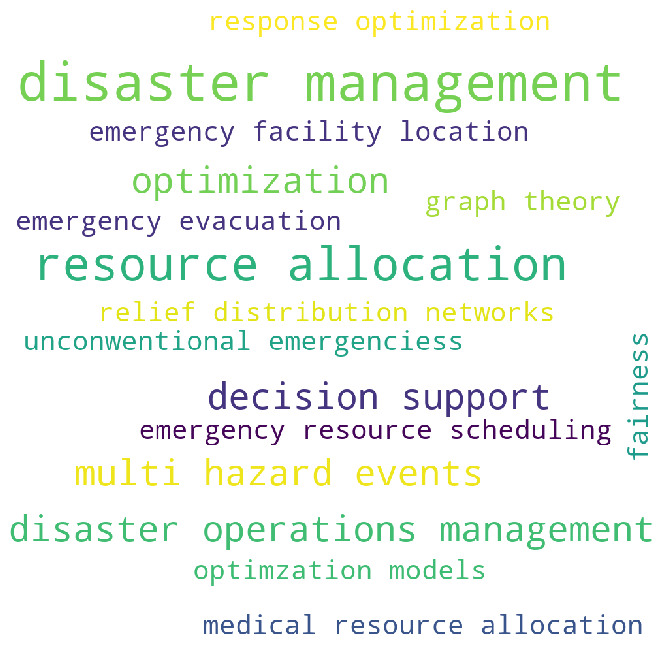

In [134]:
cloud_image = calculate_cluster_frequencies(clustered_words(7))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

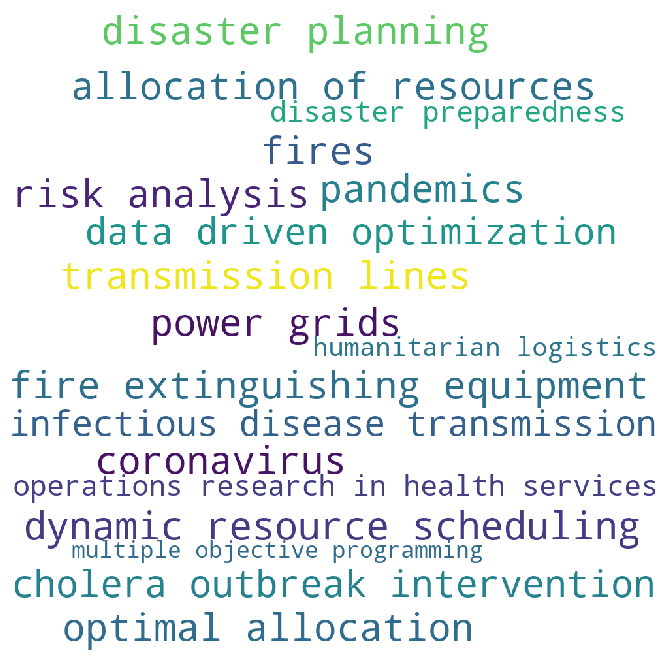

In [135]:
cloud_image = calculate_cluster_frequencies(clustered_words(8))
plt.figure(figsize=(12,12))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [136]:
keywords_list

['disaster response',
 'emergency logistics',
 'evolutionary algorithm',
 'multi objective optimization',
 'resource allocation',
 'decision support systems',
 'disaster operations management',
 'long term planning',
 'multi hazard events',
 'delay tolerant network',
 'human mobility pattern',
 'integer programming',
 'opportunistic knowledge sharing',
 'optimal resource allocation',
 'post disaster situation awareness',
 'utility function',
 'resource allocation',
 'domain transportation',
 'emergency management',
 'multi agent system',
 'collective intelligence',
 'computational resource',
 'management',
 'emerging technologies',
 'european disasters',
 'integrated disaster management',
 'decision support system',
 'disaster',
 'disaster management',
 'resource capacity',
 'resource management',
 'clock driven',
 'priority driven',
 'resource allocation',
 'scheduling algorithm',
 'decision support',
 'optimization',
 'pandemic flu',
 'resource allocation',
 'data mining',
 'knowledg

In [137]:
def calculate_frequencies(word_list):
    words_dict = {}

    for word in keywords_list:
        if word not in words_dict.keys():
            words_dict[word] = keywords_list.count(word)
        

    cloud = wordcloud.WordCloud(background_color = 'White', width = 1000, height =1000)
    cloud.generate_from_frequencies(words_dict)
    return cloud.to_array()

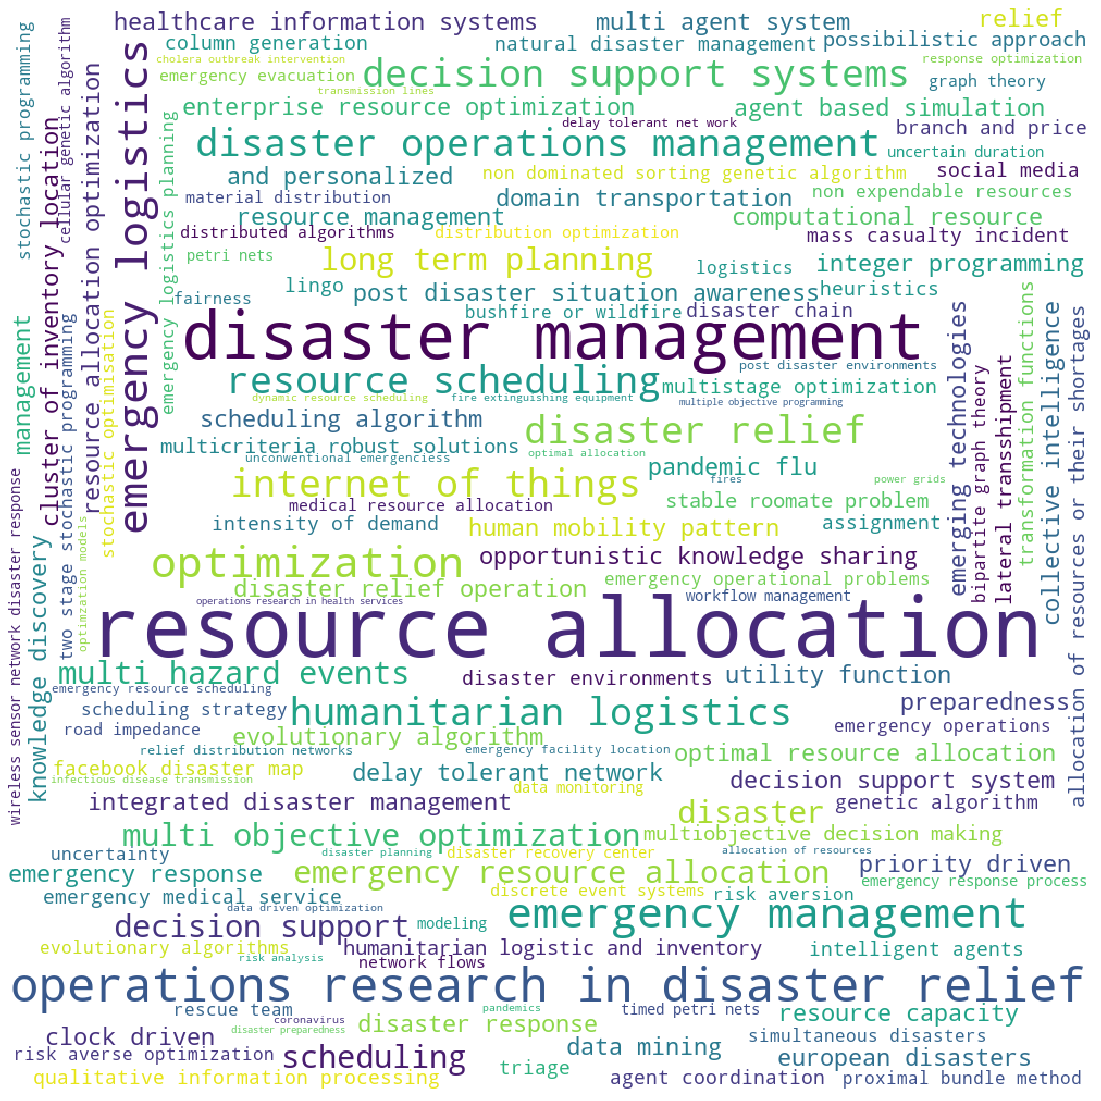

In [138]:
cloud_image = calculate_frequencies(keywords_list)
plt.figure(figsize=(20,20))
plt.imshow(cloud_image, interpolation = 'nearest')
plt.axis('off')
plt.show()